#loading libraries

In [23]:
from google.colab import drive
drive.mount('/content/drive')
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
from matplotlib import pyplot as plt
adam=Adam()
scc=sparse_categorical_crossentropy
import cv2 as cv
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the mnist  dataset

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Creating the Sequential Model an add layers

In [25]:
model=Sequential()
model.add(Dense(254, input_shape=(28, 28), name="Input_Layer", activation="relu"))

model.add(Dense(128, name="FirstDense_Layer", activation="relu"))
model.add(Flatten(name="Flatten_Layer"))
model.add(Dense(32, name="SecendDense_Layer", activation="relu"))

model.add(Dense(10, activation="softmax", name="Output_Layer"))
print(model.summary())




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 28, 254)           7366      
                                                                 
 FirstDense_Layer (Dense)    (None, 28, 128)           32640     
                                                                 
 Flatten_Layer (Flatten)     (None, 3584)              0         
                                                                 
 SecendDense_Layer (Dense)   (None, 32)                114720    
                                                                 
 Output_Layer (Dense)        (None, 10)                330       
                                                                 
Total params: 155056 (605.69 KB)
Trainable params: 155056 (605.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [26]:
model.compile(
    optimizer='adam',
    loss=scc,
    metrics=['accuracy']
)


In [27]:
history = model.fit(
    x_train,
    y_train,
    epochs=70,
    batch_size=600,

    validation_split=0.1,
    )



Epoch 1/70
90/90 [==============================] - 2s 9ms/step - loss: 3.4396 - accuracy: 0.4383 - val_loss: 0.9929 - val_accuracy: 0.6368
Epoch 2/70
90/90 [==============================] - 1s 7ms/step - loss: 0.6773 - accuracy: 0.8110 - val_loss: 0.3593 - val_accuracy: 0.9158
Epoch 3/70
90/90 [==============================] - 1s 6ms/step - loss: 0.3309 - accuracy: 0.9193 - val_loss: 0.2479 - val_accuracy: 0.9440
Epoch 4/70
90/90 [==============================] - 0s 5ms/step - loss: 0.2403 - accuracy: 0.9386 - val_loss: 0.2241 - val_accuracy: 0.9473
Epoch 5/70
90/90 [==============================] - 0s 5ms/step - loss: 0.1864 - accuracy: 0.9490 - val_loss: 0.1791 - val_accuracy: 0.9560
Epoch 6/70
90/90 [==============================] - 0s 5ms/step - loss: 0.1515 - accuracy: 0.9585 - val_loss: 0.1738 - val_accuracy: 0.9570
Epoch 7/70
90/90 [==============================] - 0s 5ms/step - loss: 0.1289 - accuracy: 0.9628 - val_loss: 0.1721 - val_accuracy: 0.9580
Epoch 8/70
90/90 [==

In [28]:
model.evaluate(
    x_test,
    y_test
)

313/313 [==============================] - 3s 8ms/step - loss: 0.3713 - accuracy: 0.9612


[0.37129926681518555, 0.9611999988555908]

#

#creating plot of model Accuracy & Loss for Analyze the process and find out if it is overfitting or not

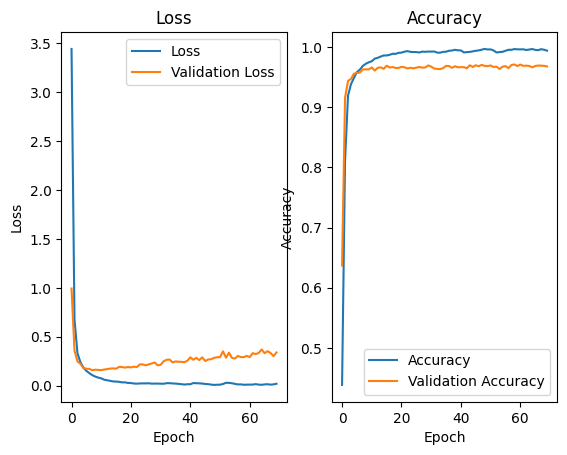

313/313 [==============================] - 3s 10ms/step - loss: 0.3713 - accuracy: 0.9612
[0.37129926681518555, 0.9611999988555908]
loss 0.02029392309486866
val_loss 0.3399852216243744
accuracy 0.9942777752876282
val_accuracy  0.9679999947547913


In [29]:
plt.subplot(1,2,1)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

plt.show()

print(model.evaluate(
    x_test,
    y_test
))

print("loss",history.history["loss"][69])
print("val_loss",history.history["val_loss"][69])

print("accuracy",history.history["accuracy"][69])
print("val_accuracy ",(history.history["val_accuracy"][69]))


#model predict images and get score

1/1 [==============================] - 0s 26ms/step
predict : 0
the number  0


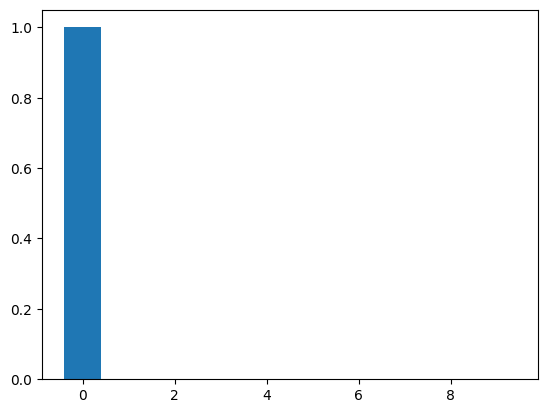

score : 1 /10
1/1 [==============================] - 0s 28ms/step
predict : 3
the number  1


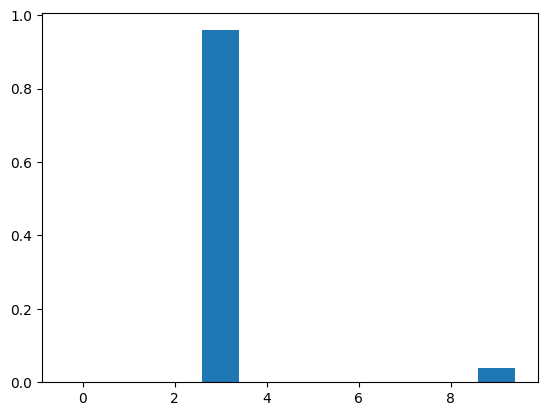

score : 1 /10
1/1 [==============================] - 0s 19ms/step
predict : 8
the number  2


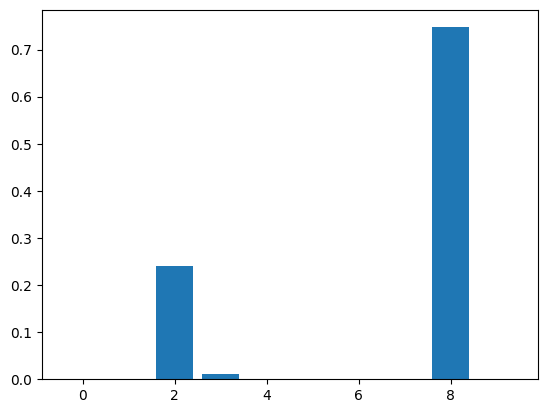

score : 1 /10
1/1 [==============================] - 0s 20ms/step
predict : 3
the number  3


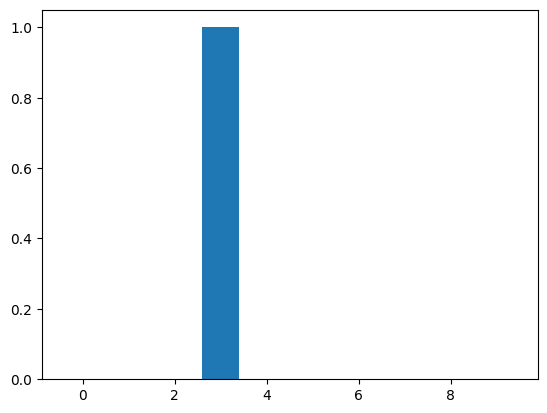

score : 2 /10
1/1 [==============================] - 0s 27ms/step
predict : 4
the number  4


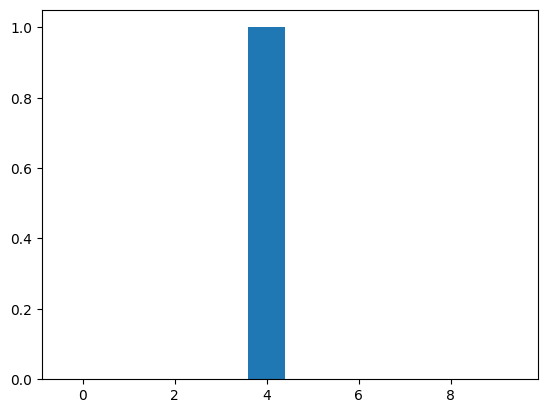

score : 3 /10
1/1 [==============================] - 0s 19ms/step
predict : 5
the number  5


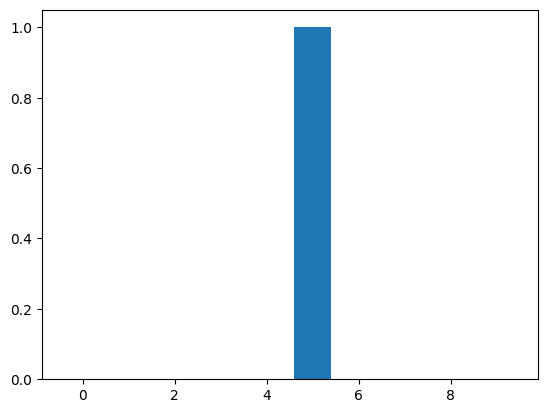

score : 4 /10
1/1 [==============================] - 0s 23ms/step
predict : 5
the number  6


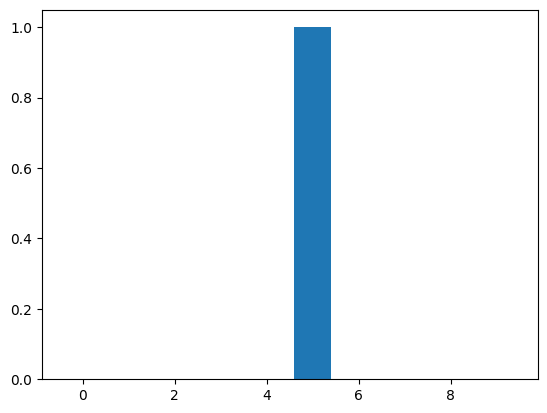

score : 4 /10
1/1 [==============================] - 0s 21ms/step
predict : 7
the number  7


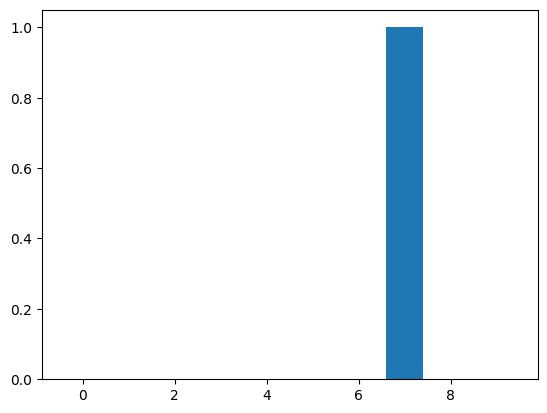

score : 5 /10
1/1 [==============================] - 0s 18ms/step
predict : 8
the number  8


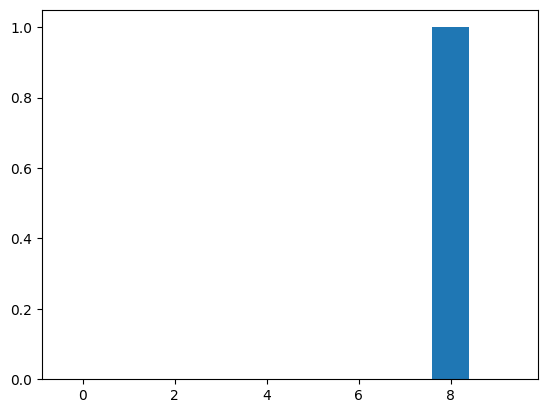

score : 6 /10
1/1 [==============================] - 0s 17ms/step
predict : 9
the number  9


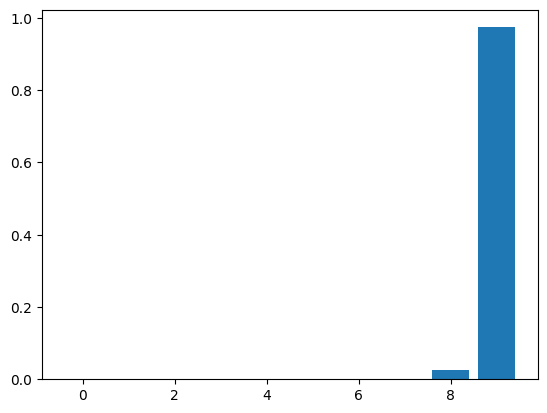

score : 7 /10


In [31]:


img0=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/0.jpg',0)
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/1.jpg',0)
img2=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/2.jpg',0)
img3=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/3.jpg',0)
img4=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/4.jpg',0)
img5=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/5.jpg',0)
img6=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/6.jpg',0)
img7=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/7.jpg',0)
img8=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/8.jpg',0)
img9=cv.imread('/content/drive/MyDrive/Colab Notebooks/DA & ML /numberzs/9.jpg',0)

img0=np.reshape(img0,(-1,28,28))
img1=np.reshape(img1, (-1,28,28))
img2=np.reshape(img2,(-1,28,28))
img3=np.reshape(img3,(-1,28,28))
img4=np.reshape(img4,(-1,28,28))
img5=np.reshape(img5,(-1,28,28))
img6=np.reshape(img6,(-1,28,28))
img7=np.reshape(img7,(-1,28,28))
img8=np.reshape(img8,(-1,28,28))
img9=np.reshape(img9,(-1,28,28))

img=[img0,img1,img2,img3,img4,img5,img6,img7,img8,img9]

N=0
score=0
for i in img :

  pre=model.predict(i)
  pre=pre.reshape((-1))
  max=pre.argmax()
  print("predict :",max)
  print("the number ",N)
  classes = np.arange(10)
  plt.bar( classes,pre)
  plt.show()
  if N==max:
    score=score+1
  N=N+1
  print("score :",score,"/10")
